In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

imagePath = '/content/drive/MyDrive/Lenna.png'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [4]:
# Read the image
img = cv2.imread(imagePath, cv2.IMREAD_COLOR) # Read the image as a color image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert the image from BGR to RGB
print("image Dimension ={}".format(img.shape))
print("image type ={}".format(img.dtype))

image Dimension =(512, 512, 3)
image type =uint8


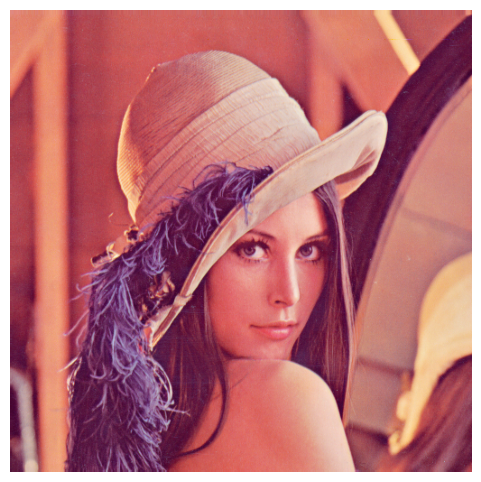

In [5]:
# plot the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
compressed_img = 100*np.ones_like(img) # create empty image with the same size as the original image
print("image Dimension ={}".format(compressed_img.shape))
print("image type ={}".format(compressed_img.dtype))

image Dimension =(512, 512, 3)
image type =uint8


In [7]:
img = img.reshape(-1, 3)

In [8]:
compressed_img = compressed_img.reshape(-1,3)

In [9]:
compressed_img.shape

(262144, 3)

In [15]:
import numpy as np

def k_means(new_data,k_cluster=8):
  centers = np.random.randint(0,255,size=(k_cluster,3)) # randomly initialize cluster centers

  for n in range(10):
    clusters = [[] for _ in range(k_cluster)] # create empty lists for each cluster
    for i in range(new_data.shape[0]):
      dist= []

      for j in range(k_cluster): # compute distances to all cluster centers
        dist_temp = euclidean_dist(centers[j],new_data[i])
        dist.append(dist_temp)

      dist = np.array(dist)
      idx = np.argmin(dist)  # find distance to the nearest cluster
      clusters[idx].append(new_data[i]) #add data to corresponding cluster
      compressed_img[i] = centers[idx]

    # Update cluster center
    for k in range(len(clusters)):

      if len(clusters[k]) > 0:
         avg = np.sum(clusters[k], axis= 0)/len(clusters[k])
         centers[k] = np.round(avg).astype(int)

  return compressed_img

In [11]:
def euclidean_dist(centers,pixel):
  distance = np.sqrt(np.sum((centers-pixel)**2))
  return distance

In [16]:
k_means(img)

array([[212, 118, 110],
       [212, 118, 110],
       [212, 118, 110],
       ...,
       [169,  68,  82],
       [169,  68,  82],
       [169,  68,  82]], dtype=uint8)

In [17]:
compressed_img = compressed_img.reshape(512, 512, 3)

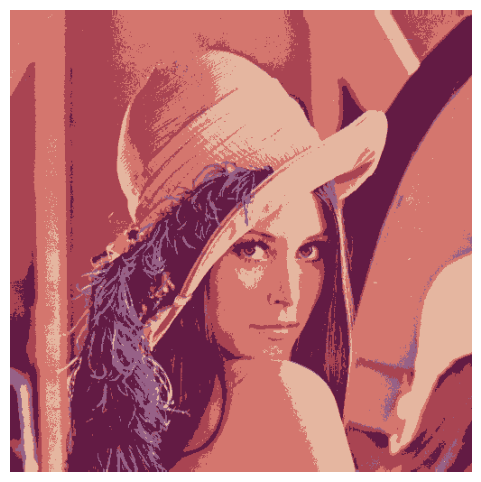

In [19]:
# plot the compressed image
plt.imshow(compressed_img)
plt.axis('off')
plt.show()

In [ ]:
# write image to disk
cv2.imwrite('output.jpg', compressed_img)

True